In [1]:
from classes.basic_optical_gating import BasicOpticalGating as BOG, BasicOpticalGatingPlotter as BOGP, Logger
from classes.drawer import Drawer

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
class DrawerCustom(Drawer):
    def draw_frame_at_phase(self, phase):
        I_0 = 1
        I_1 = 1
        I_2 = 1

        t = 2 * ((phase + 1e-10) % (2 * np.pi))
        self.canvas[0,0] = I_0 + I_1 * t + I_2 * t**2

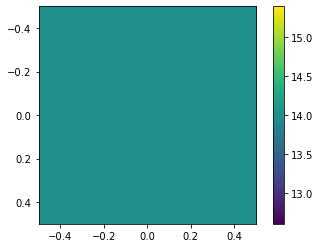

In [16]:
v = DrawerCustom(100, 39.1, (1, 1))
v.generate_reference_sequence()
v.generate_sequence()

plt.imshow(v.sequence[10])
plt.colorbar()
plt.show()

import tifffile as tf
tf.imwrite("test.tif", v.sequence)

In [17]:
sog = BOG()
sog.logger.set_quiet()
sog.set_reference_period(v.reference_period)
sog.set_reference_sequence(v.reference_sequence)
sog.set_sequence(v.sequence)
sog.set_reference_framerates(v.reference_phases)
sog.run(bias_correct = False, drift_correct = False)

sog_bc = BOG()
sog_bc.logger.set_quiet()
sog_bc.set_reference_period(v.reference_period)
sog_bc.set_reference_sequence(v.reference_sequence)
sog_bc.set_sequence(v.sequence)
sog_bc.set_reference_framerates(v.reference_phases)
sog_bc.run(bias_correct = True, drift_correct = False)

BOG ⚠ Minima for frame(s) [0, 1, 2, 3, 40, 41, 42, 47, 79, 80, 81, 83, 85, 86, 87, 118, 119, 120, 122, 124, 125, 126, 127, 129, 157, 158, 159, 161, 163, 164, 165, 166, 168, 171, 173, 174, 175, 176, 182, 196, 197, 198, 200, 202, 203, 204, 205, 207, 210, 212, 213, 214, 215, 221, 223, 225, 231, 232, 233, 234, 235, 236, 237, 239, 241, 242, 244, 246, 249, 251, 254, 262, 274, 275, 276, 278, 280, 313, 314, 315, 317, 352, 353, 354, 355, 356, 391, 392, 393, 394, 431, 432, 433, 438, 470, 471, 472, 474, 476, 477, 478, 509, 510, 511, 513, 515, 516, 517, 518, 520, 548, 549, 550, 552, 554, 555, 556, 557, 559, 562, 564, 565, 566, 567, 573, 587, 588, 589, 591, 593, 594, 595, 596, 598, 601, 603, 604, 605, 606, 612, 614, 616, 622, 623, 624, 625, 626, 627, 628, 630, 632, 633, 635, 637, 640, 642, 645, 653, 665, 666, 667, 669, 671, 704, 705, 706, 708, 743, 744, 745, 746, 747, 782, 783, 784, 785, 822, 823, 824, 829, 861, 862, 863, 865, 867, 868, 869, 900, 901, 902, 904, 906, 907, 908, 909, 911, 939, 940, 94

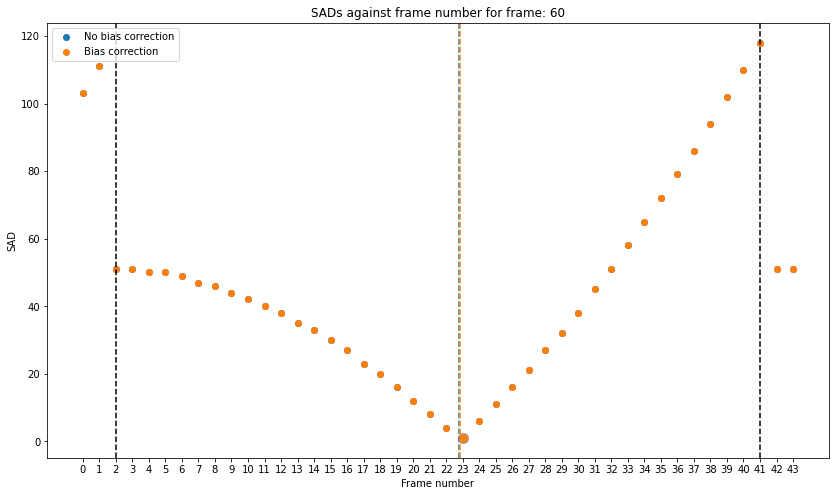

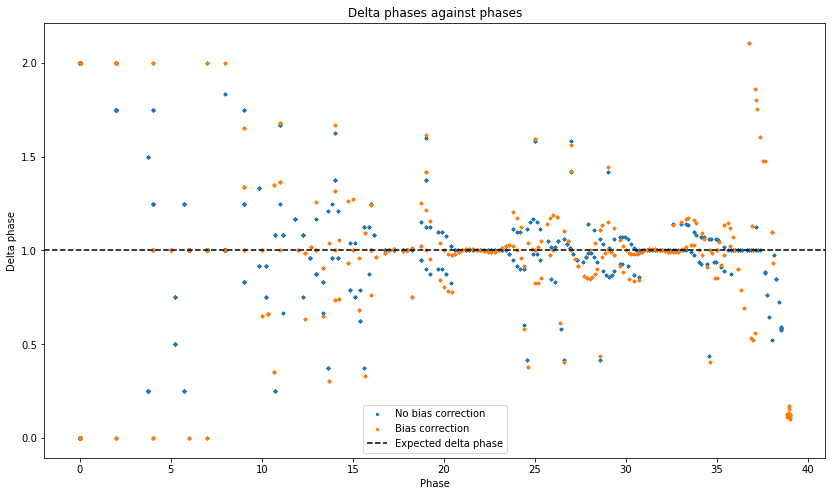

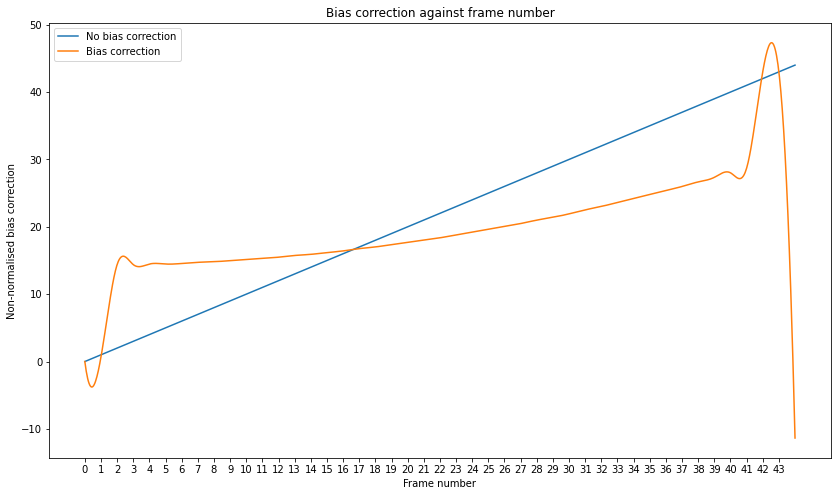

In [19]:
sogp = BOGP([sog, sog_bc], ["No bias correction", "Bias correction"])
sogp.plot_sads(60)
sogp.plot_delta_phases_phases()
sogp.plot_bias_correction()